## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя.

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0**

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [67]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns={ 'Annual Income (k$)':'Income',
       'Spending Score (1-100)':'Spending Score'}, inplace=True)

customer_set

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1**

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка;
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score'], dtype='object')

In [6]:
customer_set.shape

(200, 5)

In [68]:
customer_set.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_set.isnull().sum()

CustomerID        0
Gender            0
Age               0
Income            0
Spending Score    0
dtype: int64

## EDA Mall Customers

**Завдання 2**

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
customer_set= customer_set.drop('CustomerID', axis = 1)

**Завдання 3**

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

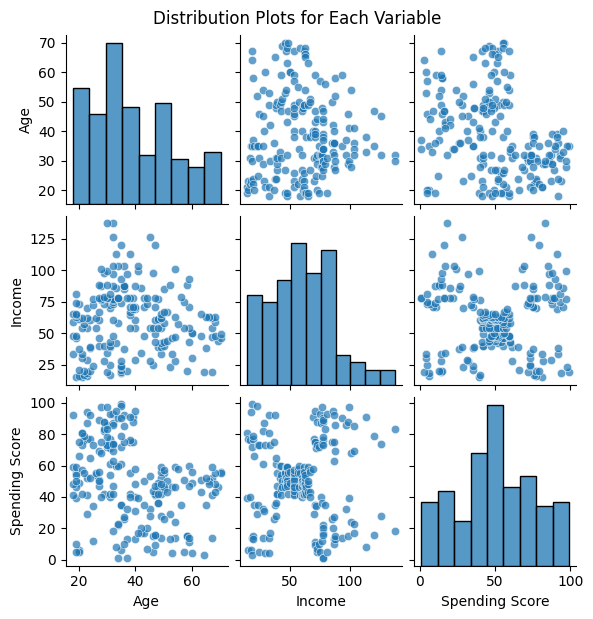

In [9]:
sns.pairplot(customer_set, height=2, hue=None, palette='husl', markers='o', plot_kws={'alpha': 0.7})
plt.suptitle('Distribution Plots for Each Variable', y=1.02)
plt.show()

**Завдання 4**

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`.
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  

* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  


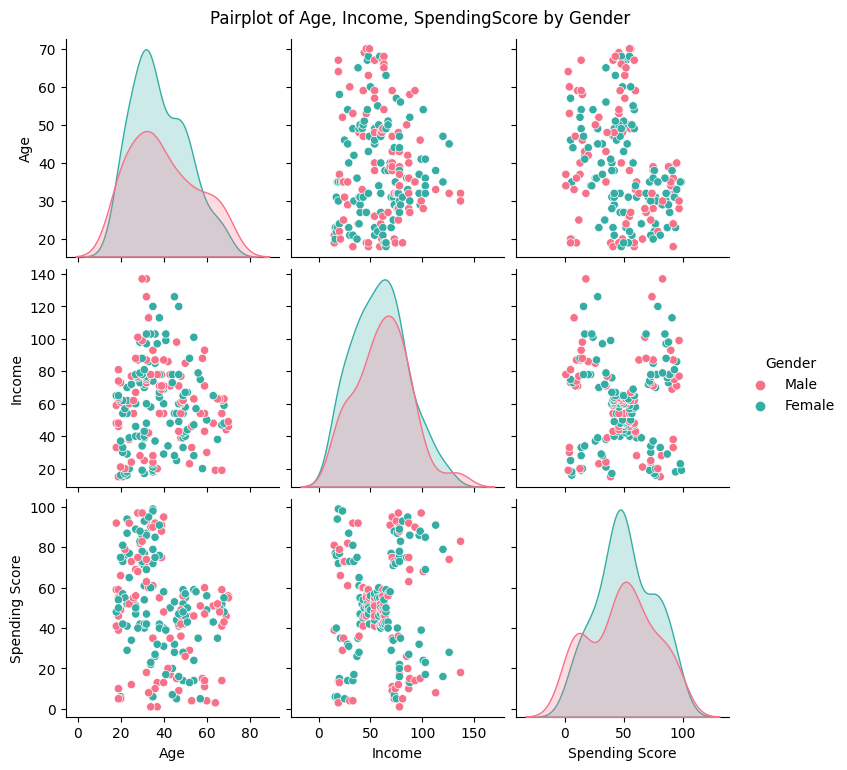

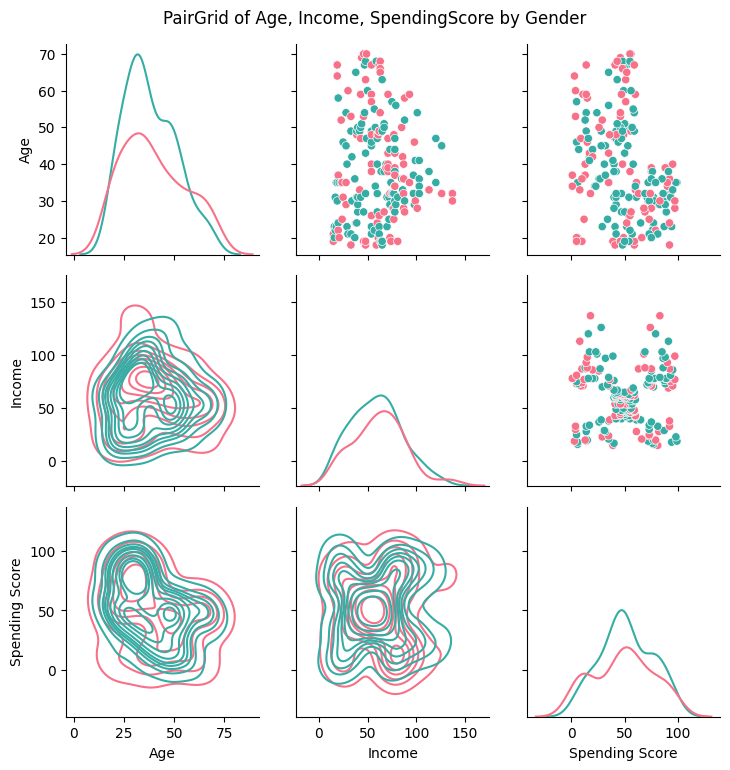

In [10]:
sns.pairplot(customer_set, hue='Gender', palette='husl')
plt.suptitle('Pairplot of Age, Income, SpendingScore by Gender', y=1.02)
plt.show()

# Використовуємо PairGrid для більшого контролю над графіками
g = sns.PairGrid(customer_set, hue='Gender', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)

# Налаштовуємо заголовки графіків
g.fig.suptitle('PairGrid of Age, Income, SpendingScore by Gender', y=1.02)
plt.show()

**Висновки з 1-4 завдання**

Наш набір даних містить такі колонки: CustomerID, Gender,	Age,	Income,	Spending Score і 200 записів. Порожніх значень там немає. На діаграмах розподілу можна побачити, що в комбінації стовпців Income та Spending Score є розділення точок, тому припускаємо, що це може означати кластери. Візуально їх тут може бути 5


**Завдання 5**

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення по статях:
Female    112
Male       88
Name: Gender, dtype: int64



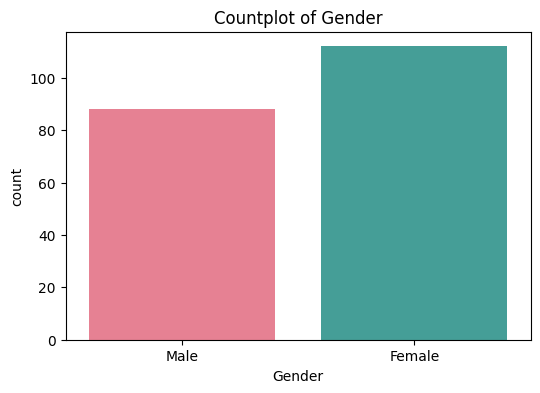

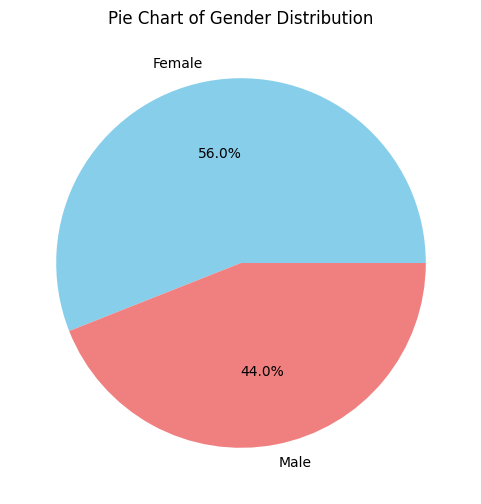

In [11]:

gender_distribution = customer_set['Gender'].value_counts()
print("Співвідношення по статях:")
print(gender_distribution)
print()

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=customer_set, palette='husl')
plt.title('Countplot of Gender')
plt.show()

plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart of Gender Distribution')
plt.ylabel('')  # Remove the y-axis label for better presentation
plt.show()

**Завдання 6**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

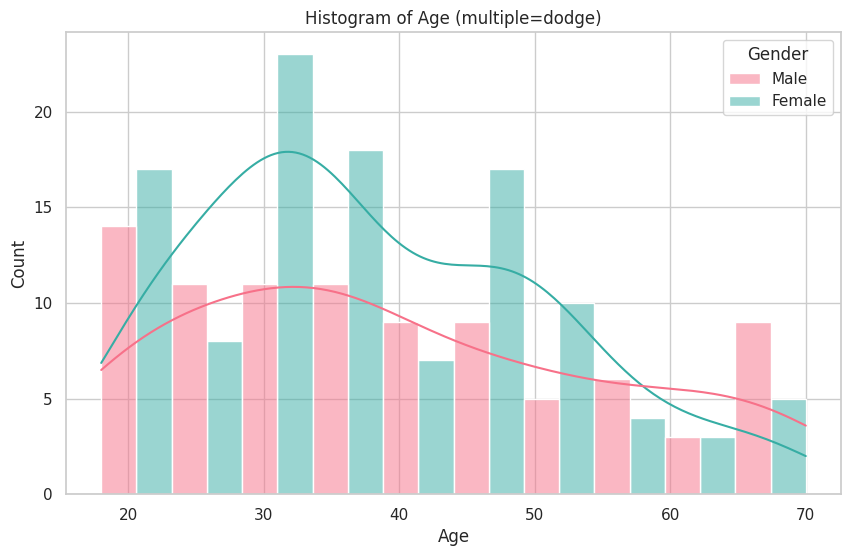

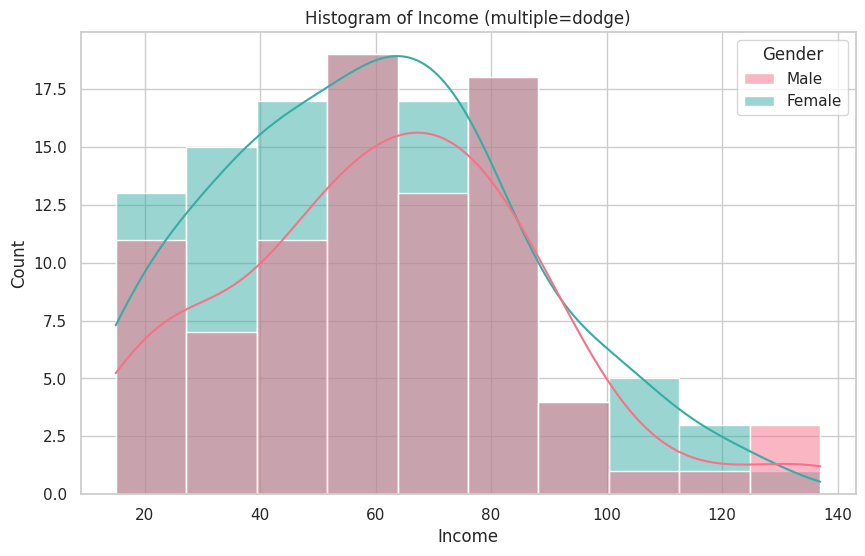

In [12]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', bins=10, kde=True, palette='husl')
plt.title('Histogram of Age (multiple=dodge)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', bins=10, kde=True, palette='husl')
plt.title('Histogram of Income (multiple=dodge)')
plt.show()



**Завдання 7**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.



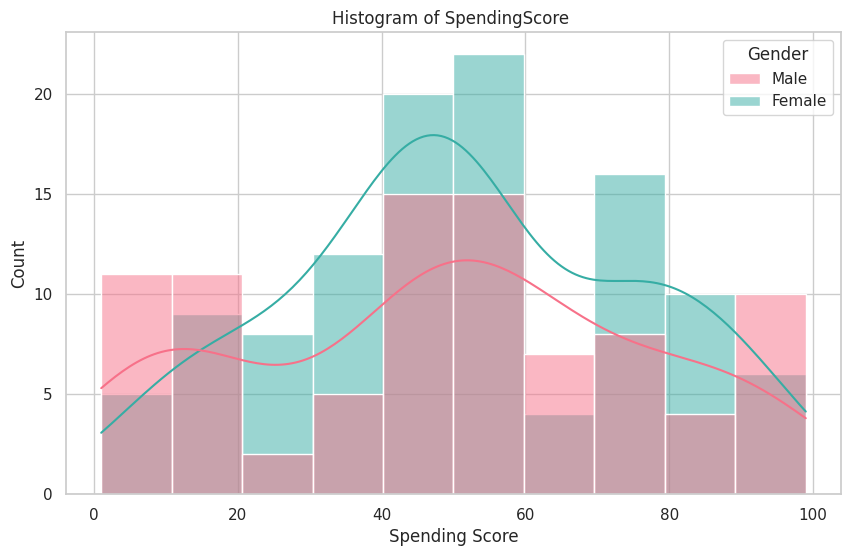

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Spending Score', hue='Gender', multiple='layer', bins=10, kde=True, palette='husl')
plt.title('Histogram of SpendingScore ')
plt.show()

**Завдання 8**

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`.

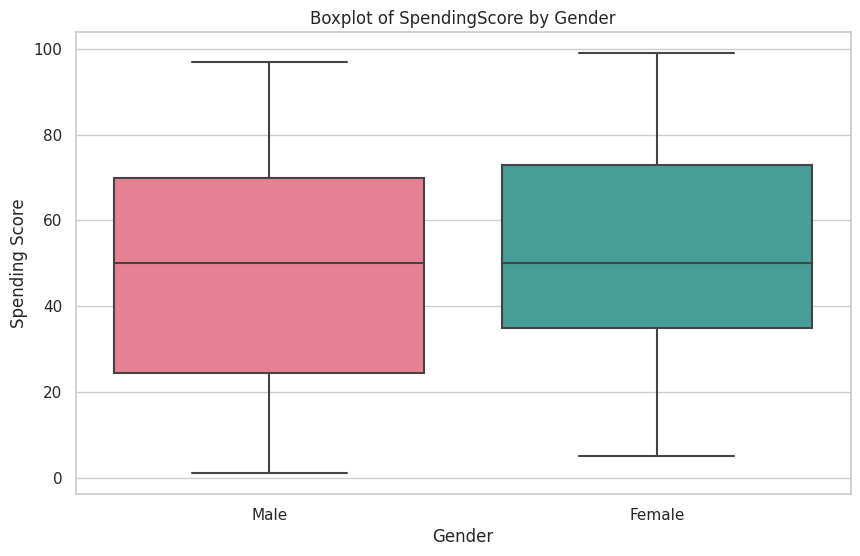

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score', data=customer_set, palette='husl')
plt.title('Boxplot of SpendingScore by Gender')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

Жінок в датасеті 112, чоловіків - 88. Це 56% і 44% відповідно. Бачимо, що жінки частіше старші за чоловіків. Також що прибуток чоловіків часто трохи більший.
Не помічено явної закономірності між статтю людини і кількістю витрат. Зате при детальнішому огляді діаграми розподілу витрат, можна помітити, що витрати можуть бути поділені на 3 класи.
Крім цього, дивлячись на boxplot по змінній SpendingScore відносно статі, можна зробити висновок, що стать не пов'язана з витратами людини, в середньому ці значення однакові в чоловіків і жінок.


## Проглядається 3 класи на 7 графіку у Spending score

## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

In [20]:
X = customer_set.drop(['Gender'], axis=1)
print(X)

     Age  Income  Spending Score
0     19      15              39
1     21      15              81
2     20      16               6
3     23      16              77
4     31      17              40
..   ...     ...             ...
195   35     120              79
196   45     126              28
197   32     126              74
198   32     137              18
199   30     137              83

[200 rows x 3 columns]


1
2
3
4
5
6
7
8
9
10


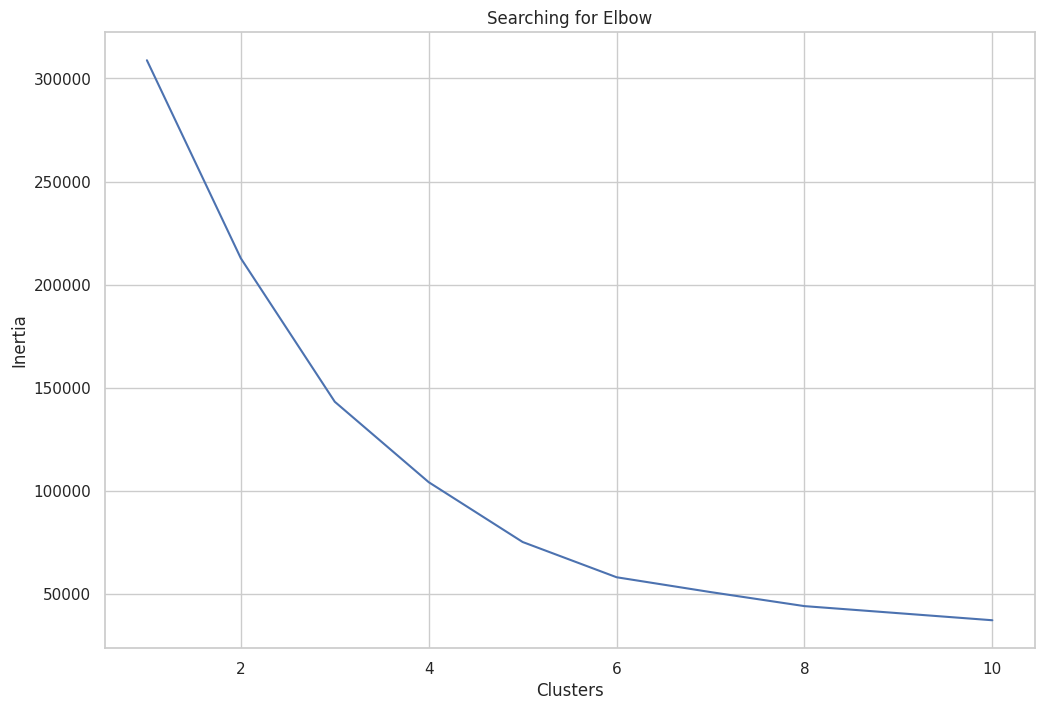

In [21]:

clusters = []

inertia = []
for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=inertia, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)**

#### Використавши метод ліктя ми бачимо, що різкіша зміна йде на 3 кластерах та 5. Також, з попередніх графіків ці числа теж підтверджувались. Spending Score чітко групувався на 3 класи, а в комбінації з Income проглядалось навіть 5 класів.

**Завдання 10**

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`.

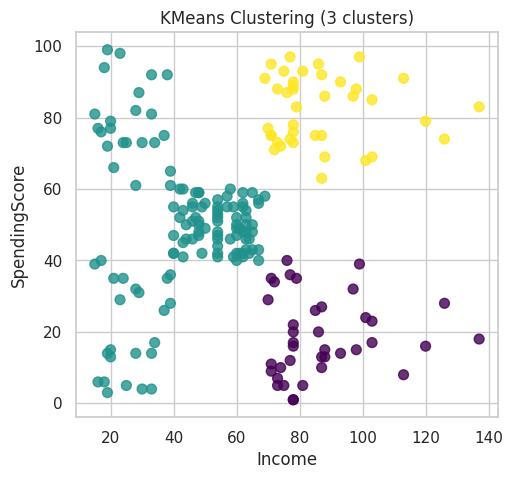

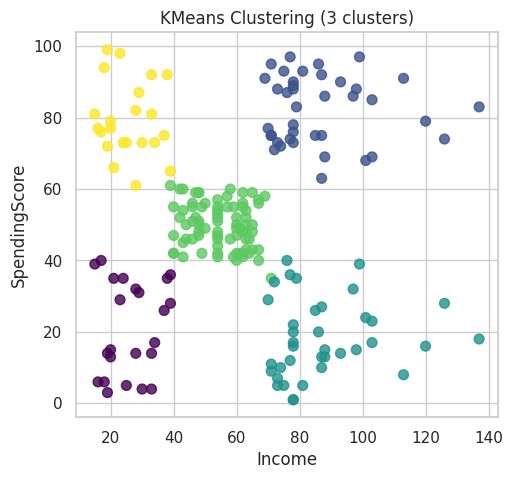

In [35]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
X['Cluster_3'] = kmeans_3.fit_predict(X)

# Створення та навчання моделі KMeans для 5 кластерів
kmeans_5 = KMeans(n_clusters=5, random_state=42)
X['Cluster_5'] = kmeans_5.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['Income'], X['Spending Score'], c=X['Cluster_3'], cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.title('KMeans Clustering (3 clusters)')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['Income'], X['Spending Score'], c=X['Cluster_5'], cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.title('KMeans Clustering (3 clusters)')
plt.show()





1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.   
3. ...

##### Як ми вже зазначали, класів може бути 3 або 5. По останніх графіках бачимо, що хоч алгоритм і розділив успішно дані на 3 класи, та один з класів значно об'ємніший за інші і може ще бути поділений на 3. А от при 5 класах ми бачимо гарно розділені кластери з рівномірно віддаленими один від одного класами.

**Завдання 11**

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [49]:
fig = plt.figure(figsize=(15, 5))

fig = px.scatter_3d(X, X['Age'], X['Income'], X['Spending Score'],  symbol = 'Cluster_3',  color='Cluster_3')
fig.show()

fig = px.scatter_3d(X, X['Age'], X['Income'], X['Spending Score'],  symbol = 'Cluster_5',  color='Cluster_5')
fig.show()




<Figure size 1500x500 with 0 Axes>

##### Як ми і припускали, оптимальна кількість класів - 5, хоча і візуально підтвердилось припущення про 3 класи, ажде 2 класи більш відділені від маси інших точок. Але все ж краще поділити ці точки ще на 3 класи

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12**

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


ward


complete


average


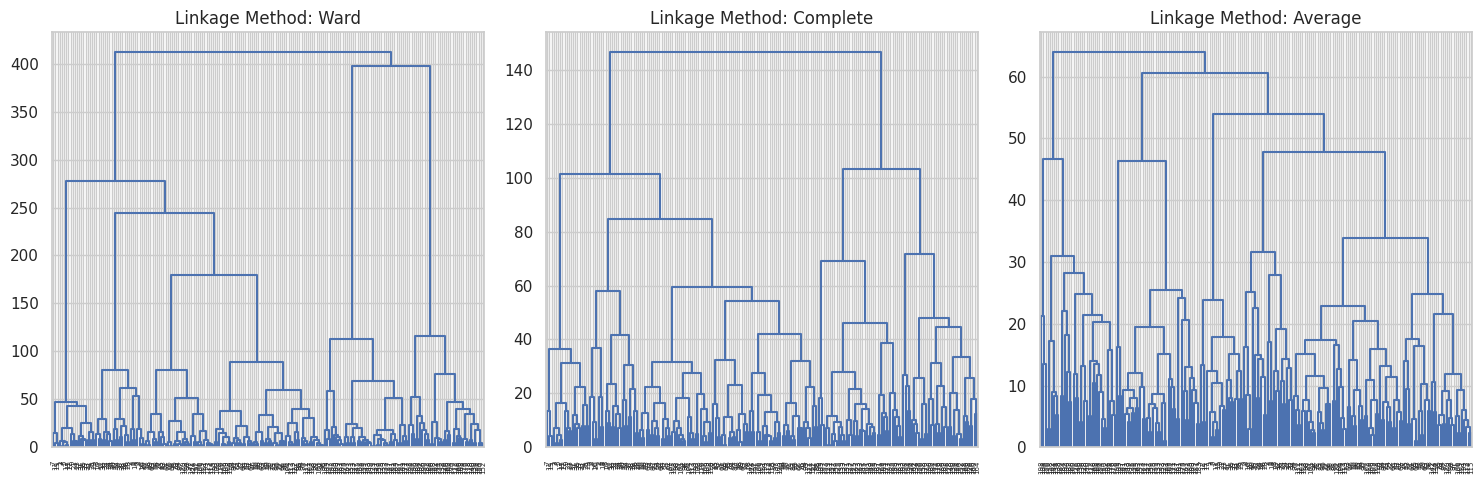

In [55]:
linkage_methods = ['ward', 'complete', 'average']

plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    print(method)
    # Створення матриці відстаней
    distance_matrix = hierarchy.linkage(X, method=method)

    # Візуалізація дендрограми
    dendrogram = hierarchy.dendrogram(distance_matrix, labels=X.index, color_threshold=0)

    plt.title(f'Linkage Method: {method.capitalize()}')
    clusters = hierarchy.fcluster(distance_matrix, 5, criterion='maxclust')
    fig = px.scatter_3d(X, X['Age'], X['Income'], X['Spending Score'],  symbol = clusters,  color=clusters)
    fig.show()
plt.tight_layout()
plt.show()

##### Бачимо, що найкраще спрацював метод Ward, в ньому можна чітко прослідкувати 5 кластерів, а також він візуально сходиться з результатами графіків, де ми ще аналізували дані, адже показує, що 2 класи краще відділені від інших, а крім того маємо ще 3 добре розділені.
##### На 2 графіку з методом Complete, який визначає відстань між двома кластерами як максимальну відстань між їхніми точками, добре видно 5 класів також,хоча і дендрограма виглядає інакше за першу. Бачимо велику відстань між найбільшими двома класами, а далі йде поділ на 4 класи, з яких потім ще в один входить 2 групи.
##### Третій же метод, Average (що визначає відстань між двома кластерами як середню відстань між всіма їхніми точками) справився найгірше. З його дендрограми, виглядає, що має бути 7 класів, хоча по візуалізації даних так не мало бути. Але треба зазначити, що на 5 кластерів він теж поділив наші дані


**Завдання 13**

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

In [63]:
print('KNN:')
fig = px.scatter_3d(X, X['Age'], X['Income'], X['Spending Score'],  symbol = 'Cluster_5',  color='Cluster_5')
fig.show()

distance_matrix = hierarchy.linkage(X, method = 'ward')
clusters = hierarchy.fcluster(distance_matrix, 5, criterion='maxclust')
print("Agglomerative clustering:")
fig = px.scatter_3d(X, X['Age'], X['Income'], X['Spending Score'],  symbol = clusters,  color=clusters)
fig.show()

KNN:


Agglomerative clustering:


**Висновки з завдання 13 (детальні)**

З графіків видно, що хоч обидва алгоритми і поділили наші точки на 5 кластерів, але зробили це трохи по-різному. Agglomerative clustering додав в центральний кластер декілька зайвих елементів, які візуально знаходяться ближче до оточуючих класів. За винятком цієї особливості більше відмінностей немає, обидва методи змогли розділити наші дані на 5 класів.
